# Module 4 Project: Financial Instrument Time Series Analysis - Techincal Notebook
### Andrew Cole

In [29]:
#Import necessary libraries, including Helper.py module

import ticker_cleaner
import Auto_ARIMA
import future_dates
import stationarity_check

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as TS
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm;

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Gathering Financial Data and Visualizing Historic Movement

In [19]:
#Use ticker_cleaner module to perform all data gathering and organization into Pandas DF for operation.

xlv_monthly_mean = ticker_cleaner.yahoo_finance_clean('XLV')
xlv_monthly_mean

,Close
Date,
2020-02-01,102.425294
2020-01-01,102.632857
2019-12-01,100.354762
2019-11-01,95.596500
2019-10-01,90.148696
...,...
1999-04-01,21.752857
1999-03-01,20.773913
1999-02-01,20.173684


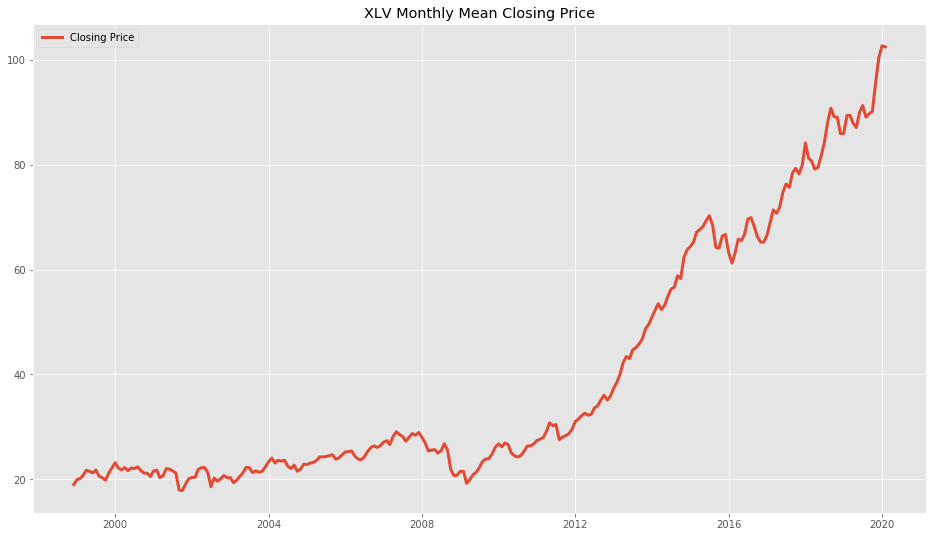

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot the historic movement of XLV's Monthly Mean Closing Price


plt.style.use('ggplot')
fig = plt.figure(figsize = (16,9))
plt.plot(xlv_monthly_mean, linewidth = 3, label = 'Closing Price')
plt.title('XLV Monthly Mean Closing Price')
plt.legend()
plt.show();
plt.savefig('XLV_beginning_close_price')


## Decomposition

In [21]:
# Use seasonal decomposition function from statsmodels library to seasonally decompose the XLV series after it has been log-transformed

decomposition = seasonal_decompose(np.log(xlv_monthly_mean))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

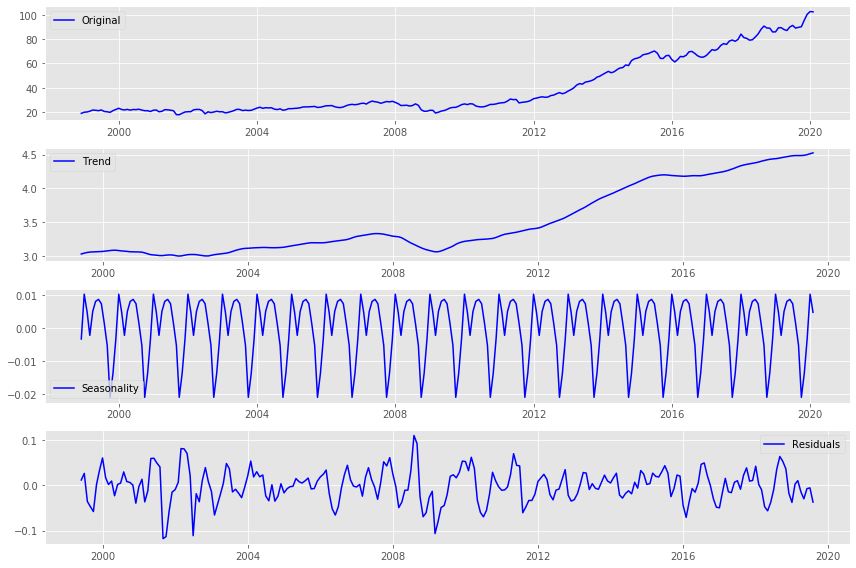

In [22]:
#Visualize trend, seasonality, and residual distribution individually

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(xlv_monthly_mean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

## Stationarity Check

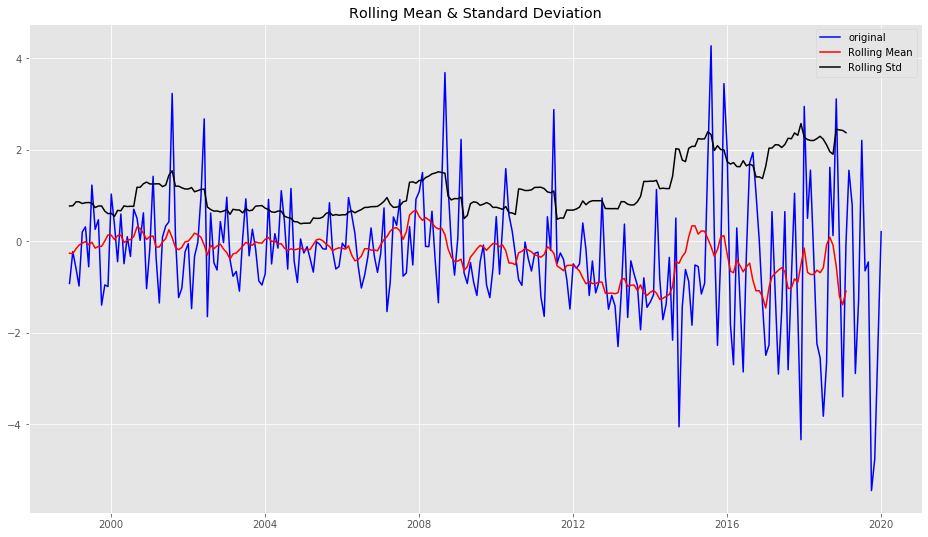

Results of Dickey-Fuller Test
Test Statistic                -1.150820e+01
p-value                        4.323855e-21
#Lags Used                     1.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


In [23]:
# Take a one period difference of the means and perform a stationarity check(Dickey-Fuller Test). Null Hypothesis: The series is NOT stationary.

xlv_differenced_mean = xlv_monthly_mean.diff(periods = 1).dropna()
stationarity_check.stationarity_check(xlv_differenced_mean.Close)

In [24]:
# We can reject the null hypothesis and say that the series is now stationary.

## Model Optimization

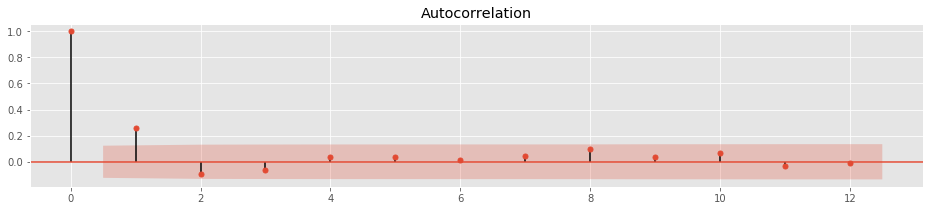

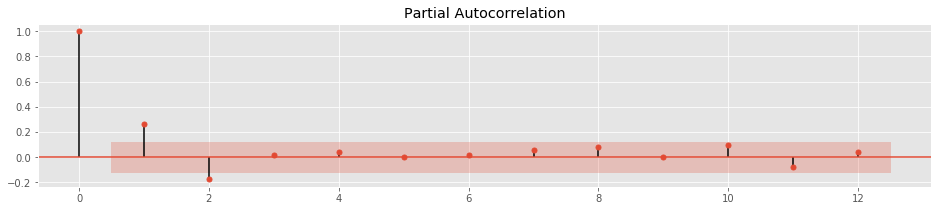

In [25]:
#Plot ACF and PACF functions to get Autoregressive and Moving Average parameters 
fig, ax = plt.subplots(figsize = (16,3))
plot_acf(xlv_differenced_mean, ax = ax, lags = 12);

fig, ax = plt.subplots(figsize = (16,3))
plot_pacf(xlv_differenced_mean, ax=ax, lags = 12);

In [26]:
# Run a SARIMA model with order (1,1,2)x(1,1,2,12) to account for seasonality as well. 
mod = sm.tsa.statespace.SARIMAX(xlv_monthly_mean, trend='n', order=(1,1,2), seasonal_order=(1,1,2,12));
res = mod.fit();
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  255
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -410.265
Date:                            Wed, 26 Feb 2020   AIC                            834.529
Time:                                    18:44:20   BIC                            858.952
Sample:                                02-01-2020   HQIC                           844.368
                                     - 12-01-1998                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3187      0.503      0.634      0.526      -0.666       1.304
ma.L1         -0.0148      0.510     -0.029      0.977      -1.015       0.985
ma.L2         -0.1942      0.160     -1.214      0.225      -0.508       0.119
ar.S.L12      -0.9996      0.066    -15.062      0.000      -1.130      -0.869
ma.S.L12       0.1530      0.598      0.256      0.798      -1.019       1.325
ma.S.L24      -0.8326      0.513     -1.622      0.105      -1.839       0.173
sigma2         1.5737      0.829      1.899      0.058      -0.051       3.198
===================================================================================
Ljung-Box (Q):                       28.10   Jarque-Bera (JB):                99.49
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
# Run a second SARIMA model with order (1,1,1)x(1,1,1,12)) to account for seasonality as well
mod = sm.tsa.statespace.SARIMAX(xlv_monthly_mean, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  255
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -413.533
Date:                            Wed, 26 Feb 2020   AIC                            837.067
Time:                                    18:44:21   BIC                            854.512
Sample:                                02-01-2020   HQIC                           844.094
                                     - 12-01-1998                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1814      0.159     -1.143      0.253      -0.493       0.130
ma.L1          0.5025      0.147      3.421      0.001       0.215       0.790
ar.S.L12      -0.0840      0.058     -1.458      0.145      -0.197       0.029
ma.S.L12      -0.8294      0.063    -13.224      0.000      -0.952      -0.706
sigma2         1.6727      0.108     15.511      0.000       1.461       1.884
===================================================================================
Ljung-Box (Q):                       30.13   Jarque-Bera (JB):                96.13
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Auto-ARIMA

In [30]:
# Utilizes the auto_arima function from Auto_ARIMA.py module to return the best parameter combination which returns the lowest AIC value
Auto_ARIMA.auto_arima()

TypeError: reduction operation 'argmin' not allowed for this dtype

In [31]:
# Create a copy DF for addition of forecasted values.
xlv_monthly_auto = xlv_monthly_mean.copy()

In [32]:
#Reindex to flip order of time series
xlv_monthly_auto = xlv_monthly_auto.reindex(index=xlv_monthly_mean.index[::-1])

In [33]:
#Re-run ARIMA model using AUTO-ARIMA generated parameters
warnings.filterwarnings(action='once')
Auto_ARIMA = sm.tsa.statespace.SARIMAX(xlv_monthly_auto.Close,
                                       order = (2,2,2),
                                       seasonal_order = (1,1,2,12),
                                       enforce_stationarity = False,
                                       enforce_invertability = False)
output_auto = Auto_ARIMA.fit()
print(output_auto.summary().tables[1])
output_auto.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1793      0.315      0.570      0.569      -0.437       0.796
ar.L2         -0.1892      0.126     -1.505      0.132      -0.436       0.057
ma.L1         -0.8808      0.385     -2.286      0.022      -1.636      -0.126
ma.L2         -0.1179      0.347     -0.339      0.734      -0.799       0.563
ar.S.L12      -0.8356      0.151     -5.545      0.000      -1.131      -0.540
ma.S.L12      -0.1179      0.177     -0.666      0.505      -0.465       0.229
ma.S.L24      -0.6836      0.170     -4.023      0.000      -1.017      -0.351
sigma2         1.6610      0.455      3.654      0.000       0.770       2.552


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  255
Model:             SARIMAX(2, 2, 2)x(1, 1, 2, 12)   Log Likelihood                -366.154
Date:                            Wed, 26 Feb 2020   AIC                            748.308
Time:                                    18:44:54   BIC                            775.236
Sample:                                12-01-1998   HQIC                           759.189
                                     - 02-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1793      0.315      0.570      0.569      -0.437       0.796
ar.L2         -0.1892      0.126     -1.505      0.132      -0.436       0.057
ma.L1         -0.8808      0.385     -2.286      0.022      -1.636      -0.126
ma.L2         -0.1179      0.347     -0.339      0.734      -0.799       0.563
ar.S.L12      -0.8356      0.151     -5.545      0.000      -1.131      -0.540
ma.S.L12      -0.1179      0.177     -0.666      0.505      -0.465       0.229
ma.S.L24      -0.6836      0.170     -4.023      0.000      -1.017      -0.351
sigma2         1.6610      0.455      3.654      0.000       0.770       2.552
===================================================================================
Ljung-Box (Q):                       28.34   Jarque-Bera (JB):                51.62
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               5.07   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Visualizing the Auto-ARIMA goodness of fit

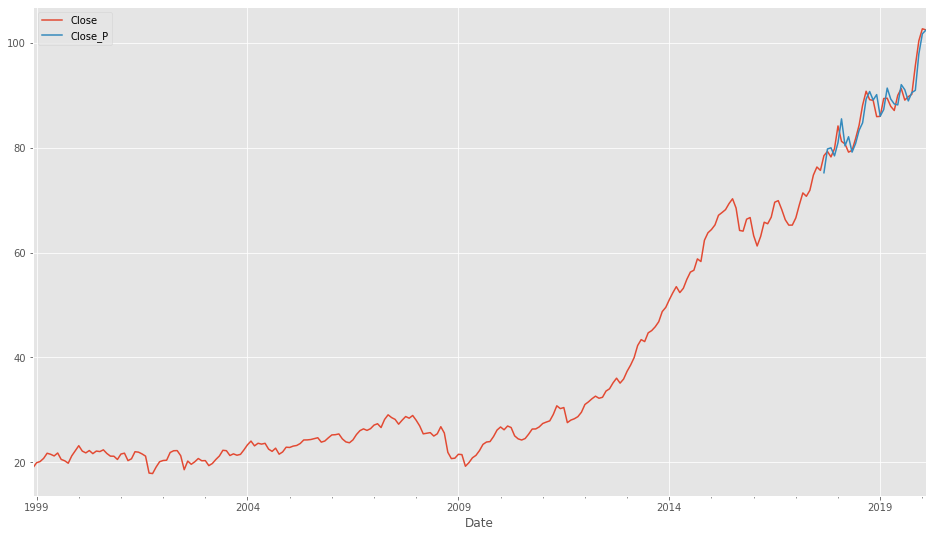

In [34]:
# Create a new feature for predicted monthly mean values and plot over original values
xlv_monthly_auto['Close_P'] = output_auto.predict(start = 225, end = 254, dynamic = False)
xlv_monthly_auto[['Close', 'Close_P']].plot(figsize = (16,9))
plt.legend(loc = 'upper left')
plt.show()


## Forecasting Values and Visualization

In [35]:
# Use future_dates function to create new DataFrame that will hold forecasted values after historic data
future_dates.future_dates(xlv_monthly_auto)

,Close,Close_P
1998-12-01,19.021429,NaN
1999-01-01,19.944737,NaN
1999-02-01,20.173684,NaN
1999-03-01,20.773913,NaN
1999-04-01,21.752857,NaN
...,...,...
2020-08-01,NaN,NaN
2020-09-01,NaN,NaN
2020-10-01,NaN,NaN
2020-11-01,NaN,NaN


In [36]:
# Obtain forecasted values for 3 years and also obtain a 95% confidence interval for the predicted values
prediction_auto = output_auto.get_forecast(steps = 36)
pred_conf_auto = prediction_auto.conf_int()

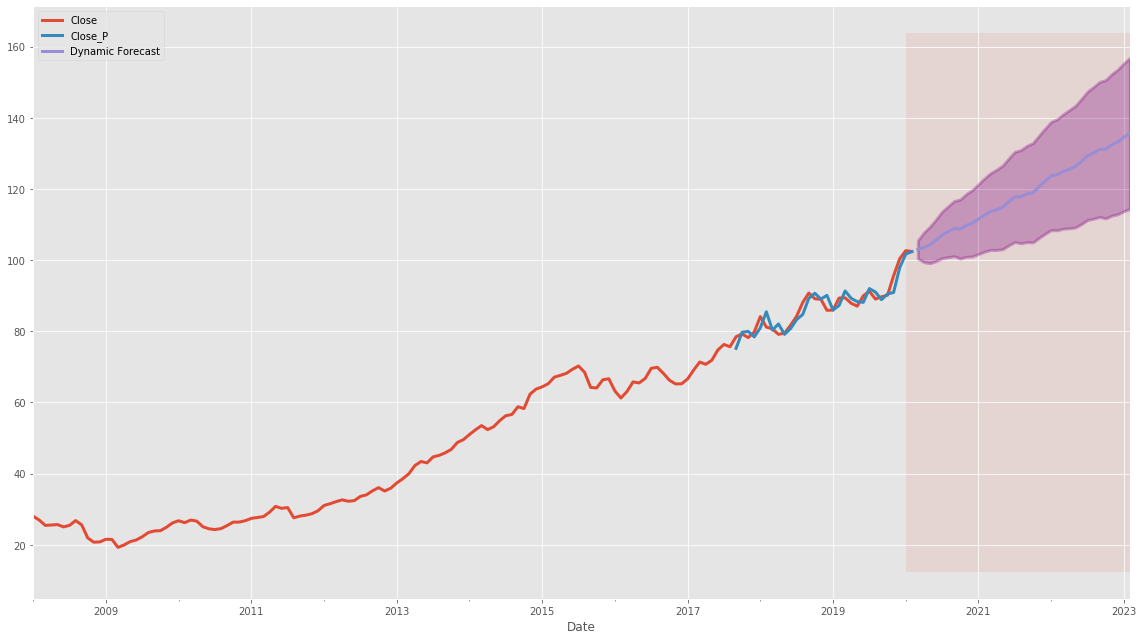

In [37]:
# Visualize original close price projection, predicted values, and confidence intervals
ax = xlv_monthly_auto['2008':].plot(label = 'Observed', figsize = (16,9), linewidth = 3)
prediction_auto.predicted_mean.plot(label = 'Dynamic Forecast', ax=ax, linewidth = 3)

ax.fill_between(pred_conf_auto.index,
                pred_conf_auto.iloc[:,0],
                pred_conf_auto.iloc[:,1], color = 'purple', alpha = .3, linewidth = 3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), pd.to_datetime('2024-01-01'), alpha=.1, zorder=-1)

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig('Auto_ARIMA_Projection.png')
plt.show();
